In [1]:
!pip install lazypredict
!pip install seaborn

# **<font style="color:purple">Import needed libraries</font>**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import plotly.express as px #interactive visualization
from sklearn.preprocessing import LabelEncoder #encoding categorical data
from sklearn.model_selection import train_test_split #splitting data into training and testing set
from sklearn.metrics import confusion_matrix, classification_report  #evaluation
from sklearn.dummy import DummyClassifier #basline approach

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
#read metadata file into dataframe

metadata_df = pd.read_csv("/kaggle/input/student-academic-success/metadata.csv" ,sep=';')

metadata_df

,Variable Name,Role,Type,Demographic,Description,Units,Missing Values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,NaN,no
1,Application mode,Feature,Integer,NaN,1 - 1st phase - general contingent 2 - Ordinan...,NaN,no
2,Application order,Feature,Integer,NaN,Application order (between 0 - first choice; a...,NaN,no
3,Course,Feature,Integer,NaN,33 - Biofuel Production Technologies 171 - Ani...,NaN,no
4,Daytime/evening attendance,Feature,Integer,NaN,1 – daytime 0 - evening,NaN,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,NaN,no
6,Previous qualification (grade),Feature,Continuous,NaN,Grade of previous qualification (between 0 and...,NaN,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,NaN,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,NaN,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,NaN,no


In [8]:
#read train file into dataframe

df_train = pd.read_csv("/kaggle/input/student-academic-success/train.csv" ,sep=';')

# Clean up the column names
df_train.columns = df_train.columns.str.replace('"', ' ')  # Remove quotes
df_train.columns = df_train.columns.str.replace('\t', ' ')  # Remove tabs
df_train.columns = df_train.columns.str.strip()  # Remove leading and trailing whitespaces

#retrieve a sample
df_train.sample(10)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
2450,1,1,1,171,1,1,130.0,1,1,38,...,0,0,0,0,0.000000,0,9.4,-0.8,-3.12,Enrolled
1977,1,44,1,9238,1,39,140.0,1,1,19,...,2,6,9,5,12.500000,0,13.9,-0.3,0.79,Graduate
491,1,1,1,9670,1,1,125.0,1,37,37,...,0,6,6,6,13.333333,0,12.4,0.5,1.79,Graduate
3274,1,39,1,9003,1,19,133.1,1,37,37,...,0,6,6,0,0.000000,0,11.1,0.6,2.02,Dropout
2235,1,1,1,171,1,1,136.0,1,19,19,...,0,0,0,0,0.000000,0,12.4,0.5,1.79,Graduate
1336,1,39,1,9500,1,1,133.1,1,1,38,...,0,7,9,6,11.685714,0,12.4,0.5,1.79,Enrolled
1164,1,39,1,9500,1,1,110.0,1,37,37,...,0,7,7,0,0.000000,0,16.2,0.3,-0.92,Dropout
327,1,1,1,9238,1,1,134.0,1,1,1,...,0,6,9,5,11.000000,0,13.9,-0.3,0.79,Graduate
1409,1,15,1,9147,1,1,150.0,1,38,1,...,0,5,8,5,11.600000,0,12.4,0.5,1.79,Graduate
1520,1,39,1,9991,0,1,120.0,1,19,19,...,0,5,5,0,0.000000,0,12.7,3.7,-1.70,Dropout


In [9]:
#read test file into dataframe

df_test = pd.read_csv("data/test.csv" ,sep=';')

# Clean up the column names
df_test.columns = df_test.columns.str.replace('"', ' ')  # Remove quotes
df_test.columns = df_test.columns.str.replace('\t', ' ')  # Remove tabs
df_test.columns = df_test.columns.str.strip()  # Remove leading and trailing whitespaces

#retrieve a sample
df_test.sample(10)

FileNotFoundError: [Errno 2] No such file or directory: 'data/test.csv'

# **<font style="color:purple">Exploratory Data Analysis</font>**
### **<font style="color:purple">Univariate Analysis</font>**
### **<font style="color:purple">Bivariate Analysis</font>**
### **<font style="color:purple">Multi Variate Analysis</font>**

In [10]:
def custom_describe(data):
    # Basic statistics
    desc_stats = data.describe()

    # Missing values count
    missing_values = data.isnull().sum()

    # Unique values count
    unique_values = data.nunique()

    # Identify numeric columns
    numeric_cols = data.select_dtypes(include=['number']).columns

    # Calculate IQR and identify outliers for each numeric column
    outliers = {}
    for col in numeric_cols:
        q1 = desc_stats.loc['25%', col]
        q3 = desc_stats.loc['75%', col]
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[col] = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

    # Get data types for each column
    data_types = data.dtypes
    
    # Combine all information
    custom_description = pd.DataFrame({
        'data_type': data_types,
        'mean': desc_stats.loc['mean'],
        'std': desc_stats.loc['std'],
        'missing_values': missing_values,
        'unique_values': unique_values,
        'outliers': outliers
    })

    return custom_description

In [11]:
custom_describe(df_train)

,data_type,mean,std,missing_values,unique_values,outliers
Admission grade,float64,126.965339,14.719294,0,596,77.0
Age at enrollment,int64,23.346610,7.793784,0,46,369.0
Application mode,int64,18.673729,17.488737,0,17,0.0
Application order,int64,1.732486,1.317140,0,8,442.0
Course,int64,8858.282768,2060.697591,0,17,357.0
Curricular units 1st sem (approved),int64,4.714407,3.079812,0,22,140.0
Curricular units 1st sem (credited),int64,0.701977,2.331195,0,21,460.0
Curricular units 1st sem (enrolled),int64,6.251695,2.456559,0,22,337.0
Curricular units 1st sem (evaluations),int64,8.263842,4.188669,0,34,130.0
Curricular units 1st sem (grade),float64,10.611847,4.862142,0,700,589.0


In [12]:
df_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [13]:
# Convert data types to categorical
df_train = df_train.astype({
    'Marital status': 'object', 
    'Application mode': 'object', 
    'Course': 'object',
    'Daytime/evening attendance': 'object',
    'Previous qualification': 'object',
    'Nacionality': 'object',
    'Mother\'s qualification': 'object',
    'Father\'s qualification': 'object',
    'Mother\'s occupation': 'object',
    'Father\'s occupation': 'object',
    'Displaced': 'object',
    'Educational special needs': 'object',
    'Debtor': 'object',
    'Tuition fees up to date': 'object',
    'Gender': 'object', 
    'Scholarship holder': 'object', 
    'International': 'object'
})

In [14]:
# Convert data types to categorical
df_test = df_test.astype({
    'Marital status': 'object', 
    'Application mode': 'object', 
    'Course': 'object',
    'Daytime/evening attendance': 'object',
    'Previous qualification': 'object',
    'Nacionality': 'object',
    'Mother\'s qualification': 'object',
    'Father\'s qualification': 'object',
    'Mother\'s occupation': 'object',
    'Father\'s occupation': 'object',
    'Displaced': 'object',
    'Educational special needs': 'object',
    'Debtor': 'object',
    'Tuition fees up to date': 'object',
    'Gender': 'object', 
    'Scholarship holder': 'object', 
    'International': 'object'
})

NameError: name 'df_test' is not defined

In [15]:
df_train['Target'].value_counts()

Target
Graduate    1786
Dropout     1116
Enrolled     638
Name: count, dtype: int64

In [16]:
#visualize data from 'Marital status' on y-axis and 'Target' on x-axis from df_train
fig=px.histogram(df_train, 
                 x="Marital status",
                 color="Target",
                 hover_data=df_train.columns,
                 title="Distribution of Marital status fot Target Category",
                 barmode="group")
fig.show()

In [17]:
fig = px.histogram(df_train, 
                   x="Marital status",
                   title="Distribution of Marital status")
fig.show()

In [18]:
fig = px.pie(df_train, names='Marital status', title='Distribution of Marital status')
fig.update_layout(width=800, height=600)
fig.show()

In [19]:
import plotly.express as px

# Filter the dataframe
filtered_df = df_train[df_train['Application mode'] == 39]

# Prepare data for the plot
data = filtered_df['Marital status'].value_counts().reset_index()

# Rename the columns
data.columns = ['Marital Status', 'Count']

# Plot a bar chart
fig = px.bar(data, x='Marital Status', y='Count', 
             title='Marital Status for Application Mode (people who are over 23 years old)')
fig.show()

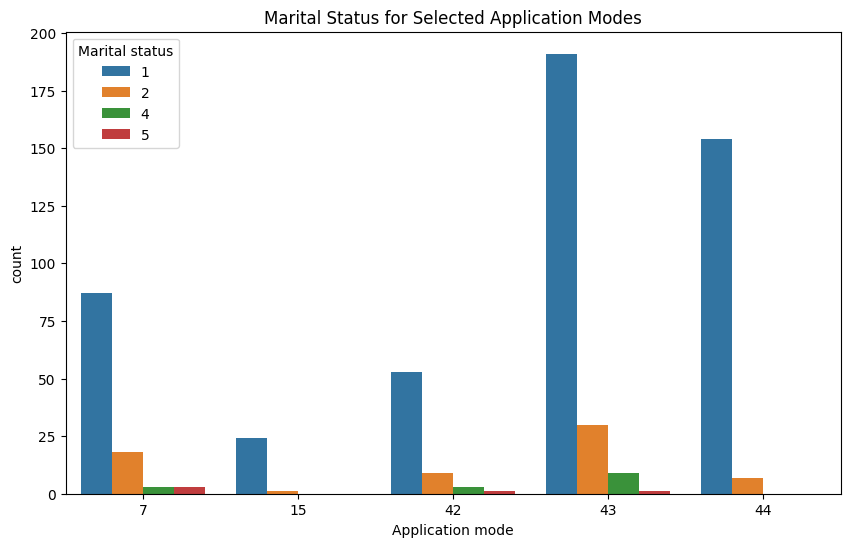

In [20]:
import seaborn as sns

# Filter the dataframe
filtered_df = df_train[df_train['Application mode'].isin([7, 15, 42, 43, 44])]

# Create a countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Application mode', hue='Marital status', data=filtered_df)
plt.title('Marital Status for Selected Application Modes')
plt.show()  #No Application mode for Marital status 3

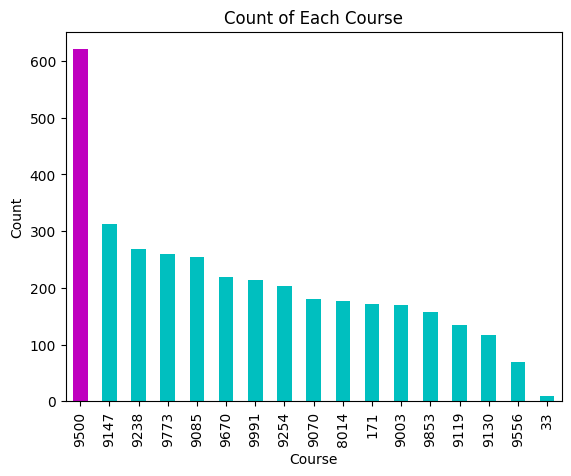

In [21]:
# visualize courses freq and highight course with highest freq
# Get the value counts
counts = df_train['Course'].value_counts()

# Create a list of colors, one for each course
colors = ['c']*len(counts)

# Set the color of the bar with the maximum count to be red
colors[np.argmax(counts.values)] = 'm'

# Plot the bar chart with the color parameter
counts.plot(kind='bar', color=colors)
plt.xlabel('Course')
plt.ylabel('Count')
plt.title('Count of Each Course')
plt.show()

In [22]:
df_train['Course'].value_counts().idxmax() #return index =course with highest freq  

9500

In [23]:
df_train['Course'].value_counts().max() #return freq of course

621

In [24]:
df_train['Application order'].value_counts()

Application order
1    2414
2     444
3     239
4     209
5     123
6     109
9       1
0       1
Name: count, dtype: int64

In [25]:
import plotly.express as px

# Get the value counts and convert to DataFrame
counts = df_train['Application order'].value_counts().reset_index()
counts.columns = ['Application order', 'Count']

# Create a new column to indicate whether the application order has the highest frequency
counts['Max'] = counts['Count'] == counts['Count'].max()

# Plot the bar chart with the color parameter
fig = px.bar(counts, x='Application order', y='Count', color='Max', 
             labels={'Application order': 'Application order', 'Count': 'Count', 'Max': 'Max'},
             title='Count of Each Application Order')
fig.show()

In [26]:
df_train['Application order'].groupby(df_train['Course']).max() #return each course and the highest rank of its app orders

Course
33      1
171     6
8014    5
9003    2
9070    6
9085    5
9119    6
9130    3
9147    6
9238    6
9254    6
9500    6
9556    6
9670    6
9773    6
9853    6
9991    9
Name: Application order, dtype: int64

In [27]:
df_train[df_train['Course']==9556][['Application order']].value_counts() #course 9556 has 69 orders > return each rank of 69


Application order
1                    37
2                    20
3                     4
6                     4
4                     3
5                     1
Name: count, dtype: int64

In [28]:
# Get the value counts and convert to DataFrame
counts = df_train[df_train['Course']==9556]['Application order'].value_counts().reset_index()
counts.columns = ['Application order', 'Count']

# Create a new column to indicate whether the application order has the highest frequency
counts['Max'] = counts['Count'] == counts['Count'].max()

# Plot the bar chart with the color parameter
fig = px.bar(counts, x='Application order', y='Count', color='Max', 
             labels={'Application order': 'Application order', 'Count': 'Count', 'Max': 'Max'},
             title='Count of Each Application Order for Course 9556')
fig.show()

In [29]:
# Get the value counts and convert to DataFrame
counts = df_train[df_train['Course']==9500]['Application order'].value_counts().reset_index()
counts.columns = ['Application order', 'Count']

# Create a new column to indicate whether the application order has the highest frequency
counts['Max'] = counts['Count'] == counts['Count'].max()

# Plot the bar chart with the color parameter
fig = px.bar(counts, x='Application order', y='Count', color='Max', 
             labels={'Application order': 'Application order', 'Count': 'Count', 'Max': 'Max'},
             title='Count of Each Application Order for Course 9500')
fig.show()

In [30]:
# Get the value counts and convert to DataFrame
counts = df_train['Daytime/evening attendance'].value_counts().reset_index()
counts.columns = ['Daytime/evening attendance', 'Frequency']

# Plot the bar chart
fig = px.bar(counts, x='Daytime/evening attendance', y='Frequency', 
             labels={'Daytime/evening attendance': 'Daytime/evening attendance', 'Frequency': 'Frequency'},
             title='Frequency of Daytime/evening attendance')
fig.show()

In [31]:
# visualize data from 'Daytime/evening attendance' on y-axis and 'Marital status' on x-axis
fig = px.histogram(df_train, x='Marital status', color='Daytime/evening attendance', 
                   title='Daytime/evening attendance vs Marital status', barmode='group')
fig.show()

In [32]:
# visualize data from 'Target' on x-axis and 'Daytime/evening attendance' on y-axis
fig = px.histogram(df_train, x='Target', color='Daytime/evening attendance', 
                   title='Daytime/evening attendance vs Target', barmode='group')
fig.show()

In [33]:
#i want to see the 'Previous qualification' for course ==9500
dfprev =df_train[df_train['Course']==9500][['Previous qualification']]
dfprev

,Previous qualification
6,1
11,1
17,1
22,1
24,1
...,...
3484,1
3486,1
3510,1
3527,1


In [34]:
df_train[df_train['Course']==9500]['Previous qualification'].value_counts()

Previous qualification
1     573
3      20
19     18
40      4
6       2
5       1
2       1
4       1
38      1
Name: count, dtype: int64

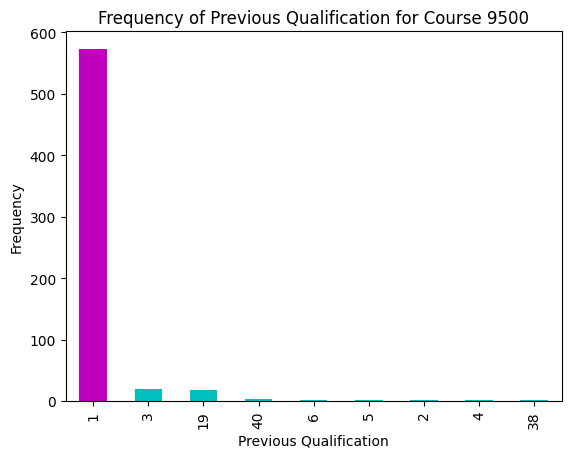

In [35]:
counts= df_train[df_train['Course']==9500]['Previous qualification'].value_counts()

# Create a list of colors, one for each course
colors = ['c']*len(counts)

# Set the color of the bar with the maximum count to be red
colors[np.argmax(counts.values)] = 'm'

counts.plot(kind='bar' , color=colors)
plt.xlabel('Previous Qualification')
plt.ylabel('Frequency')
plt.title('Frequency of Previous Qualification for Course 9500')
plt.show()


In [36]:
df_train['Nacionality'].value_counts()

Nacionality
1      3453
41       30
6        12
26       12
22       10
24        3
11        3
62        2
100       2
101       2
21        2
103       2
25        1
32        1
13        1
109       1
2         1
108       1
105       1
Name: count, dtype: int64

In [37]:
x = df_train['Nacionality'].value_counts().head(5)

for nacionality, count in x.items():
    print(f"Nacionality: {nacionality}, Count: {count}")


Nacionality: 1, Count: 3453
Nacionality: 41, Count: 30
Nacionality: 6, Count: 12
Nacionality: 26, Count: 12
Nacionality: 22, Count: 10


In [38]:
x = df_train['Nacionality'].value_counts().head(5)

# Initialize an empty list to store the 'Nacionality' values
nacionality_values = []

# Iterate through the 'Nacionality' values in x
for nacionality in x.index:
    # Store the 'Nacionality' value in the list
    nacionality_values.append(nacionality)

print(nacionality_values)

[1, 41, 6, 26, 22]


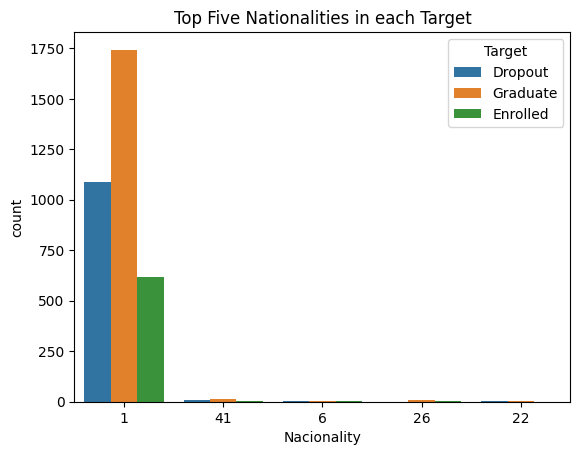

In [39]:
# Filter the dataframe
df_filtered = df_train[df_train['Nacionality'].isin(nacionality_values)]

# Create a count plot
sns.countplot(x='Nacionality', hue='Target', data=df_filtered, order=nacionality_values)

plt.title('Top Five Nationalities in each Target')
plt.show()

### **Explore relationship between "Father's qualification", "Mother's qualification",and "Previous qualification"**

In [40]:
from scipy.stats import chi2_contingency
# Create contingency tables
contingency1 = pd.crosstab(df_train['Father\'s qualification'], df_train['Mother\'s qualification'])
contingency2 = pd.crosstab(df_train['Father\'s qualification'], df_train['Previous qualification'])
contingency3 = pd.crosstab(df_train['Mother\'s qualification'], df_train['Previous qualification'])

# Calculate Chi-Square statistic
chi2_1, p_1, dof_1, _ = chi2_contingency(contingency1)
chi2_2, p_2, dof_2, _ = chi2_contingency(contingency2)
chi2_3, p_3, dof_3, _ = chi2_contingency(contingency3)

print(f"Chi-Square statistic for 'Father's qualification' and 'Mother's qualification': {chi2_1}, p-value: {p_1}")
print(f"Chi-Square statistic for 'Father's qualification' and 'Previous qualification': {chi2_2}, p-value: {p_2}")
print(f"Chi-Square statistic for 'Mother's qualification' and 'Previous qualification': {chi2_3}, p-value: {p_3}")

Chi-Square statistic for 'Father's qualification' and 'Mother's qualification': 18946.640023900112, p-value: 0.0
Chi-Square statistic for 'Father's qualification' and 'Previous qualification': 1245.2553701201186, p-value: 1.1606534800699648e-82
Chi-Square statistic for 'Mother's qualification' and 'Previous qualification': 1041.4467578772196, p-value: 4.693282065133676e-64


In [41]:
import plotly.graph_objects as go

# Create heatmaps
fig1 = go.Figure(data=go.Heatmap(z=contingency1.values, x=contingency1.columns, y=contingency1.index, colorscale='Viridis'))
fig1.update_layout(title="Heatmap of Father's and Mother's Qualifications", xaxis_title="Mother's Qualification", yaxis_title="Father's Qualification")
fig1.show()

fig2 = go.Figure(data=go.Heatmap(z=contingency2.values, x=contingency2.columns, y=contingency2.index, colorscale='Viridis'))
fig2.update_layout(title="Heatmap of Father's Qualifications and Previous Qualifications", xaxis_title="Previous Qualification", yaxis_title="Father's Qualification")
fig2.show()

fig3 = go.Figure(data=go.Heatmap(z=contingency3.values, x=contingency3.columns, y=contingency3.index, colorscale='Viridis'))
fig3.update_layout(title="Heatmap of Mother's Qualifications and Previous Qualifications", xaxis_title="Previous Qualification", yaxis_title="Mother's Qualification")
fig3.show()

In [42]:
# Create a 3D scatter plot
fig = px.scatter_3d(df_train, x="Father's qualification", y="Mother's qualification", z="Previous qualification")

# Add labels
fig.update_layout(
    title="3D Scatter Plot of Qualifications",
    scene=dict(
        xaxis_title="Father's qualification",
        yaxis_title="Mother's qualification",
        zaxis_title="Previous qualification"
    )
)

# Show the plot
fig.show()

In [43]:
# Create contingency tables
contingency1 = pd.crosstab(df_train["Father's occupation"], df_train[ "Mother's occupation"])
contingency2 = pd.crosstab(df_train["Father's occupation"], df_train['Previous qualification'])
contingency3 = pd.crosstab(df_train[ "Mother's occupation"], df_train['Previous qualification'])

# Calculate Chi-Square statistic
chi2_1, p_1, dof_1, _ = chi2_contingency(contingency1)
chi2_2, p_2, dof_2, _ = chi2_contingency(contingency2)
chi2_3, p_3, dof_3, _ = chi2_contingency(contingency3)

print(f"Chi-Square statistic for 'Father's occupation' and 'Mother's occupation': {chi2_1}, p-value: {p_1}")
print(f"Chi-Square statistic for 'Father's occupation' and 'Previous qualification': {chi2_2}, p-value: {p_2}")
print(f"Chi-Square statistic for 'Mother's occupation' and 'Previous qualification': {chi2_3}, p-value: {p_3}")

Chi-Square statistic for 'Father's occupation' and 'Mother's occupation': 38471.63542019644, p-value: 0.0
Chi-Square statistic for 'Father's occupation' and 'Previous qualification': 756.1929349891557, p-value: 8.093888840140419e-05
Chi-Square statistic for 'Mother's occupation' and 'Previous qualification': 697.0734907076746, p-value: 1.5632723159421298e-11


In [44]:
# Create a 3D scatter plot
fig = px.scatter_3d(df_train, x="Father's occupation", y="Mother's occupation", z="Previous qualification")

# Add labels
fig.update_layout(
    title="3D Scatter Plot of Qualifications and Occupations",
    scene=dict(
        xaxis_title="Father's occupation",
        yaxis_title="Mother's occupation",
        zaxis_title="Previous qualification"
    )
)

# Show the plot
fig.show()

In [45]:
# Create a histogram
fig = px.histogram(df_train, x='Tuition fees up to date', nbins=50, 
                   labels={'Tuition fees up to date': 'Tuition Fees'}, 
                   title='Histogram of Tuition Fees Up to Date')

# Update x-axis
fig.update_xaxes(tickvals=[0,1])

fig.show()

In [46]:
# Create a histogram
fig = px.histogram(df_train, x='Displaced', color='Tuition fees up to date', 
                   title='Displaced vs Tuition fees up to date', nbins=len(df_train['Displaced'].unique()), 
                   barmode='group')
fig.show()

In [47]:
# Create a histogram
fig = px.histogram(df_train, x='Displaced', color='Tuition fees up to date', 
                   title='Displaced vs Tuition fees up to date', nbins=len(df_train['Displaced'].unique()), 
                   barmode='group')
fig.show()

In [48]:
import plotly.express as px

# Create a histogram
fig = px.histogram(df_train, x='Target', color='Displaced', 
                   title='Displaced vs Target', nbins=len(df_train['Target'].unique()), 
                   barmode='group')
fig.show()

In [49]:
# Create a histogram
fig = px.histogram(df_train, x='Displaced', color='Daytime/evening attendance', 
                   title='Daytime/evening attendance for Displaced', nbins=len(df_train['Displaced'].unique()), 
                   barmode='group')
fig.show()

In [50]:
# Create a scatter plot
fig = px.scatter(df_train, x='Admission grade', y='Previous qualification (grade)', 
                 labels={'x': 'Admission grade', 'y': 'Previous qualification (grade)'}, 
                 title='Scatter Plot of Admission grade and Previous qualification (grade)')
fig.show()

In [51]:
# Create a histogram
fig = px.histogram(df_train, x='Target', color='Educational special needs', 
                   title='Educational special needs vs Target', nbins=len(df_train['Target'].unique()), 
                   barmode='group')
fig.show()

In [52]:
# Create a histogram
fig = px.histogram(df_train, x='Target', color='Debtor', 
                   title='Debtor vs Target', nbins=len(df_train['Target'].unique()), 
                   barmode='group')
fig.show()

In [53]:
# Count the number of occurrences of each gender
gender_counts = df_train['Gender'].value_counts()

# Create a pie chart
fig = px.pie(values=gender_counts, names=gender_counts.index, title='Gender Distribution')
fig.show()

In [54]:
# Group by 'International' and 'Target' and count the number of occurrences
grouped_df = df_train.groupby(['International', 'Target']).size().reset_index(name='Count')

# Create a bar plot
fig = px.bar(grouped_df, x='International', y='Count', color='Target', 
             title='International vs Target', labels={'Count': 'Count', 'International': 'International'} ,barmode="group")

fig.show()

In [55]:
import plotly.graph_objects as go

# Group by 'International' and 'Displaced' and count the number of occurrences
grouped_df = df_train.groupby(['International', 'Displaced']).size().unstack().reset_index()

# Create a bar plot
fig = go.Figure(data=[
    go.Bar(name='Not Displaced', x=grouped_df['International'], y=grouped_df[0]),
    go.Bar(name='Displaced', x=grouped_df['International'], y=grouped_df[1])
])

# Change the bar mode
fig.update_layout(barmode='group', title='International vs Displaced', 
                  xaxis_title='International', yaxis_title='Count')

fig.show()

In [56]:
# Group by 'International' and 'Daytime/evening attendance' and count the number of occurrences
grouped_df = df_train.groupby(['International', 'Daytime/evening attendance']).size().reset_index(name='Count')

# Create a histogram
fig = px.histogram(grouped_df, x='International', y='Count', color='Daytime/evening attendance', 
                   title='International vs Daytime/evening attendance', 
                   labels={'Count': 'Count', 'International': 'International'}, 
                   barmode='group')

fig.show()

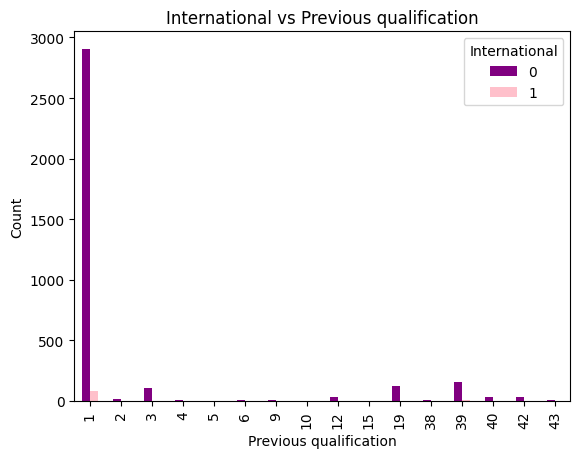

In [57]:
# Group by 'International' and 'Previous qualification' and count the number of occurrences
grouped_df = df_train.groupby(['Previous qualification', 'International']).size().unstack()

# Define a list of colors
colors = ['purple', 'pink']

# Plot the grouped DataFrame as a bar plot with the specified colors
grouped_df.plot.bar(color=colors)
plt.title('International vs Previous qualification')
plt.xlabel('Previous qualification')
plt.ylabel('Count')
plt.show()

In [58]:
# Select rows where 'Scholarship holder' is True and calculate the mean age
average_age = df_train[df_train['Scholarship holder'] == True]['Age at enrollment'].mean()

print(average_age)

20.647791619479047


### **Find Relation between continuous features**

In [59]:
#find correlation matrix

# Select the specific columns
selected_df = df_train.select_dtypes("number")

# Compute correlation
selected_df.corr()

,Application order,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Application order,1.000000,-0.063754,-0.100983,-0.269828,-0.137047,-0.013418,-0.094092,0.034170,0.057095,-0.021743,-0.128821,0.035244,-0.054057,0.072462,0.051054,-0.006790,-0.102263,-0.008212,0.037023
Previous qualification (grade),-0.063754,1.000000,0.564693,-0.122583,-0.023650,-0.039624,-0.077912,0.037109,0.051000,0.000498,-0.032345,-0.040446,-0.061022,0.039666,0.045557,-0.021064,0.050392,0.023600,-0.050431
Admission grade,-0.100983,0.564693,1.000000,-0.020084,0.040465,-0.032854,-0.071069,0.063761,0.067126,0.013323,0.043145,-0.041291,-0.061017,0.071042,0.063390,-0.007359,0.042733,-0.018290,-0.018121
Age at enrollment,-0.269828,-0.122583,-0.020084,1.000000,0.224180,0.133302,0.134501,-0.068508,-0.169470,0.058633,0.199197,0.072717,0.042432,-0.129152,-0.188709,0.064313,0.019882,0.037460,-0.072905
Curricular units 1st sem (credited),-0.137047,-0.023650,0.040465,0.224180,1.000000,0.768276,0.548641,0.625127,0.122443,0.119313,0.940278,0.631519,0.425662,0.481513,0.130600,0.045303,0.011275,0.020401,-0.020998
Curricular units 1st sem (enrolled),-0.013418,-0.039624,-0.032854,0.133302,0.768276,1.000000,0.686577,0.768977,0.381894,0.131876,0.747358,0.938448,0.601403,0.671158,0.364974,0.060719,0.040771,0.036102,-0.028510
Curricular units 1st sem (evaluations),-0.094092,-0.077912,-0.071069,0.134501,0.548641,0.686577,1.000000,0.534009,0.418090,0.245612,0.529024,0.612346,0.776066,0.447480,0.357352,0.118650,0.063084,-0.005089,-0.093253
Curricular units 1st sem (approved),0.034170,0.037109,0.063761,-0.068508,0.625127,0.768977,0.534009,1.000000,0.702371,-0.019940,0.606303,0.731289,0.549561,0.904171,0.691410,-0.068422,0.053485,-0.014530,0.021233
Curricular units 1st sem (grade),0.057095,0.051000,0.067126,-0.169470,0.122443,0.381894,0.418090,0.702371,1.000000,-0.080196,0.113926,0.410715,0.490747,0.680108,0.841409,-0.076470,0.024000,-0.028091,0.055506
Curricular units 1st sem (without evaluations),-0.021743,0.000498,0.013323,0.058633,0.119313,0.131876,0.245612,-0.019940,-0.080196,1.000000,0.116336,0.104153,0.138096,-0.029598,-0.078075,0.583086,-0.032411,-0.054555,-0.156746


In [60]:
fig = px.imshow(selected_df.corr(), title="Correlation Plot of dataframe")
fig.update_layout(width=1500, height=1500)
fig.show()


# **<font style="color:purple">Data quality ensuring and Cleaning</font>**

- check for missing values
- check for duplicate values
- check outliers
- handle categorical data
- handle skewness
- data scaling


### **<font style="color:green">Check for missing values</font>**


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3540 non-null   object 
 1   Application mode                                3540 non-null   object 
 2   Application order                               3540 non-null   int64  
 3   Course                                          3540 non-null   object 
 4   Daytime/evening attendance                      3540 non-null   object 
 5   Previous qualification                          3540 non-null   object 
 6   Previous qualification (grade)                  3540 non-null   float64
 7   Nacionality                                     3540 non-null   object 
 8   Mother's qualification                          3540 non-null   object 
 9   Father's qualification                   

In [62]:
def drop_high(df):
    # Low P-value at CHI-Square
    cols = ["Father's qualification", "Father's occupation"]
    
    # High Linearilty
    cols+=[
        "Curricular units 1st sem (credited)", 
        "Curricular units 1st sem (approved)",
        "Curricular units 2nd sem (credited)",
        "Curricular units 2nd sem (approved)",
        "Curricular units 2nd sem (enrolled)",
        "Curricular units 2nd sem (evaluations)",
        "Curricular units 2nd sem (grade)"
    ]
    
    df = df.drop(columns=cols)
    return df

In [63]:
df_train = drop_high(df_train)

In [64]:
#find correlation matrix

# Select the specific columns
selected_df = df_train.select_dtypes("number")

fig = px.imshow(selected_df.corr(), title="Correlation Plot of dataframe")
fig.update_layout(width=1500, height=1500)
fig.show()

### **<font style="color:green">Check for duplicate values</font>**

In [65]:
print(f"Total number of duplicated values : " ,df_train.duplicated().sum())

Total number of duplicated values :  0


### **<font style="color:green">Check outliers</font>**

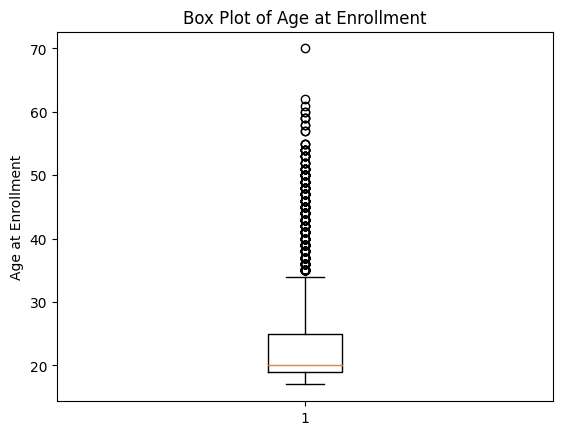

In [66]:
#Visualize box plot for continuous variables
#use boxplot
plt.boxplot(df_train['Age at enrollment'])
plt.title('Box Plot of Age at Enrollment')
plt.ylabel('Age at Enrollment')
plt.show()

### **<font style="color:green">Skewness</font>**

In [67]:
# Calculate skewness for each column
for column in df_train.columns:
    skewness_per_column = df_train[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for Marital status: 4.507478474471416
Skewness for Application mode: 0.3985562374045688
Skewness for Application order: 1.871279527997589
Skewness for Course: -3.8138700010739175
Skewness for Daytime/evening attendance: -2.491182735193889
Skewness for Previous qualification: 2.9292784353490617
Skewness for Previous qualification (grade): 0.3134482512749625
Skewness for Nacionality: 10.782985759050973
Skewness for Mother's qualification: 0.043988500182786834
Skewness for Mother's occupation: 5.365652833248881
Skewness for Admission grade: 0.5506813209538153
Skewness for Displaced: -0.1678904791109671
Skewness for Educational special needs: 8.805272901338082
Skewness for Debtor: 2.4638368732889835
Skewness for Tuition fees up to date: -2.3722358041069915
Skewness for Gender: 0.6357577130804752
Skewness for Scholarship holder: 1.158674823094051
Skewness for Age at enrollment: 2.050087044553749
Skewness for International: 6.143845415218351
Skewness for Curricular units 1st sem (en

TypeError: could not convert string to float: 'Dropout'

In [ ]:
# Overlay kernel density plot on histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_train["Previous qualification (grade)"], bins=30, kde=True)
plt.title(f"Overlaying Kernel Density Plot on Histogram for : Previous qualification (grade)")
plt.show()

In [ ]:
# Overlay kernel density plot on histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_train['Admission grade'], bins=30, kde=True)
plt.title(f"Overlaying Kernel Density Plot on Histogram for : Admission grade")
plt.show()

In [ ]:
# Overlay kernel density plot on histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_train["Age at enrollment"], bins=30, kde=True)
plt.title(f"Overlaying Kernel Density Plot on Histogram for : Age at enrollment")
plt.show()

In [ ]:
# Overlay kernel density plot on histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_train['Curricular units 1st sem (grade)'], bins=30, kde=True)
plt.title(f"Overlaying Kernel Density Plot on Histogram for : Curricular units 1st sem (grade)")
plt.show()

In [ ]:
# Overlay kernel density plot on histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_train['Curricular units 2nd sem (grade)'], bins=30, kde=True)
plt.title(f"Overlaying Kernel Density Plot on Histogram for : Curricular units 2nd sem (grade)")
plt.show()

### **<font style="color:purple">Splitting Data</font>**

In [104]:
#Seperate Label and Features from df_train
X = df_train.drop('Target', axis=1)
y = df_train['Target']

In [105]:
#Split data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = df_train['Target'])

In [106]:
# Calculate proportions on train and test
train_proportions = y_train.value_counts(normalize=True).reset_index(name="train")
test_proportions = y_test.value_counts(normalize=True).reset_index(name="test")

# Merge on the 'damage_grade' column
merged_proportions = pd.merge(train_proportions, test_proportions, on="Target", how="left")

merged_proportions

,Target,train,test
0,Graduate,0.50,0.50
1,Dropout,0.32,0.31
2,Enrolled,0.18,0.18


### **<font style="color:green">Handle categorical data & Scalling</font>**

In [120]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold

In [128]:
# Print x train shape before processing
print("Before preprocessing there were {} rows and {} columns".format(*X_train.shape))

# Identify columns
fts_cat = X.select_dtypes('object').columns
fts_num = X.select_dtypes("number").columns
fts_outlier = X.select_dtypes("number").drop(columns=["Previous qualification (grade)", "Admission grade"]).columns
# Create a single Preprocessing step for predictors
preprocessor = ColumnTransformer(
    transformers=[
        #('Outlier_scaler', RobustScaler(quantile_range = (0.1,0.8)), fts_outlier),
        ('scaler', StandardScaler(), fts_num), # Centre and scale
        ('ohe', OneHotEncoder(handle_unknown='ignore'), fts_cat),# One Hot encode
        ('nzv', VarianceThreshold(threshold = 0.5), [])
    ])
      
# Apply the transformations to both train and test
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.fit_transform(X_test)   

# Print x train shape before processing
print("After preprocessing there are {} rows and {} columns".format(*X_train_transformed.shape))

Before preprocessing there were 2832 rows and 27 columns
After preprocessing there are 2832 rows and 159 columns


In [125]:
X_train_df = pd.DataFrame.sparse.from_spmatrix(X_train_transformed)
X_test_df = pd.DataFrame.sparse.from_spmatrix(X_test_transformed)

In [126]:
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
0,0.18,0.94,0.21,-0.68,-0.09,-0.29,0.46,-0.20,-0.19,-1.02,...,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00
1,0.18,1.16,0.98,-0.68,-0.09,-0.53,0.67,-0.20,-0.19,-0.31,...,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
2,-0.56,-0.56,-0.47,-0.68,-0.09,0.18,0.21,-0.20,-0.19,1.71,...,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
3,-0.56,-2.43,-1.79,1.51,0.32,2.30,0.14,-0.20,-0.19,1.71,...,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
4,-0.56,0.71,0.41,-0.56,0.73,-0.06,0.72,-0.20,-0.19,-0.84,...,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,-0.56,0.56,0.87,-0.30,1.14,0.42,0.55,-0.20,-0.19,-1.02,...,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00
2828,-0.56,-1.83,-1.40,-0.43,-0.09,0.65,0.01,-0.20,-0.19,-0.20,...,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00
2829,-0.56,-0.41,-0.27,-0.43,-0.09,-0.29,0.33,-0.20,-0.19,0.29,...,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00
2830,-0.56,-0.03,0.60,-0.68,-0.09,0.65,0.37,-0.20,-0.19,-0.84,...,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00


In [117]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_df, X_test_df, y_train, y_test)

100%|██████████| 29/29 [00:26<00:00,  1.08it/s]


In [118]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,


Test Accuracy of random forest Model:  72.03 %

Train Accuracy of random forest Model:  100.0 %



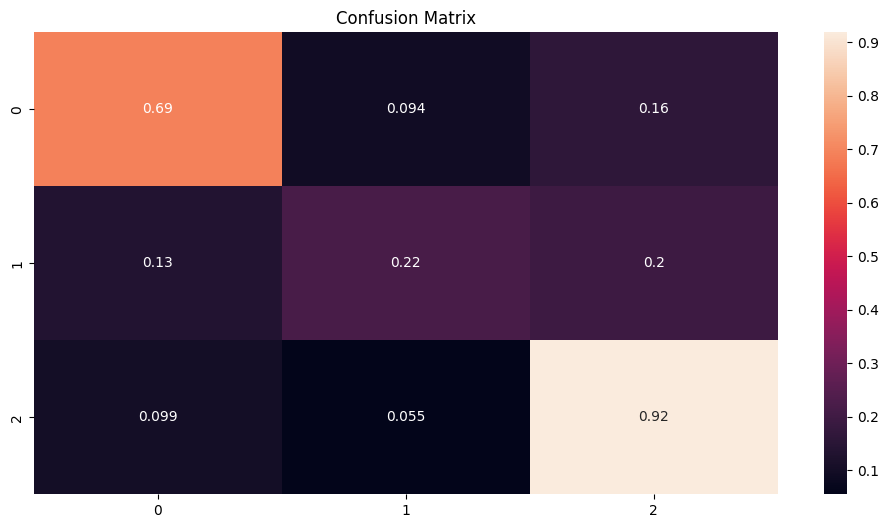

In [127]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf.fit(X_train, y_train) # fit model
y_pred = rf.predict(X_test) # predict on test

# Calculate confusion matrix
con_mat = confusion_matrix(y_test, y_pred)
con_mat = con_mat / con_mat.astype(float).sum(axis=1)


print('Test Accuracy of random forest Model: ',round(100*rf.score(X_test, y_test),2),'%')
print('')
print('Train Accuracy of random forest Model: ',round(100*rf.score(X_train, y_train),2),'%')
print('')

# Plot Model
plt.figure(figsize = (12,6))
ax = sns.heatmap(con_mat, annot = True)
plt.title("Confusion Matrix")
plt.show()

### **<font style="color:brown">Baseline : Dummy Classifier</font>**

In [66]:
#create a baseline model using DummyClassifier
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [67]:
# Train Score
print(dummy_clf.score(X_train, y_train))

0.5042372881355932


In [68]:
# Test Score
print(dummy_clf.score(X_test, y_test))

0.5056497175141242


In [69]:
#make prediction on test data
y_pred = dummy_clf.predict(X_test)

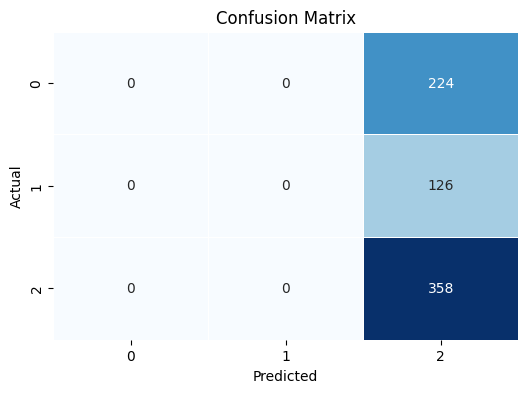

In [70]:
#evaluate the model
# Print the confusion matrix, classification report
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [71]:
print(classification_report(y_test, y_pred, zero_division=1))


              precision    recall  f1-score   support



           0       1.00      0.00      0.00       224

           1       1.00      0.00      0.00       126

           2       0.51      1.00      0.67       358



    accuracy                           0.51       708

   macro avg       0.84      0.33      0.22       708

weighted avg       0.75      0.51      0.34       708




### **<font style="color:brown">Logistic Regression</font>**

In [72]:
#apply logistic regression
from sklearn.linear_model import LogisticRegression

# Apply logistic regression with a larger number of iterations
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [73]:
# Train Score
print(f"Training Score is :" ,log_reg.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,log_reg.score(X_test, y_test))

Training Score is : 0.782132768361582

Testing Score is : 0.7669491525423728


In [74]:
#make prediction on test data
y_pred = log_reg.predict(X_test)

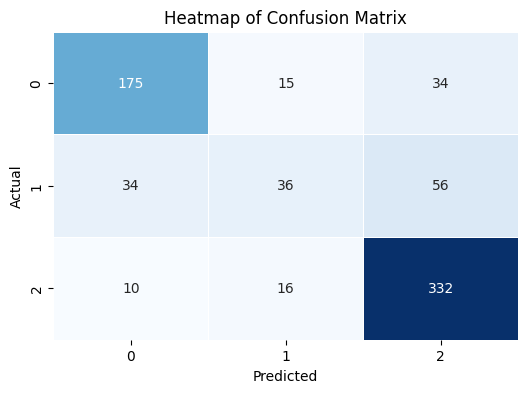

In [75]:
#evaluate the model
# Print the confusion matrix, classification report
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [76]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support



           0       0.80      0.78      0.79       224

           1       0.54      0.29      0.37       126

           2       0.79      0.93      0.85       358



    accuracy                           0.77       708

   macro avg       0.71      0.66      0.67       708

weighted avg       0.75      0.77      0.75       708




### **<font style="color:brown">SVC model</font>**

In [77]:
#create SVC model
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [78]:
# Train Score
print(f"Training Score is :" ,svc.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,svc.score(X_test, y_test))


Training Score is : 0.7528248587570622

Testing Score is : 0.7245762711864406


In [79]:
#make prediction on test data
y_pred = svc.predict(X_test)


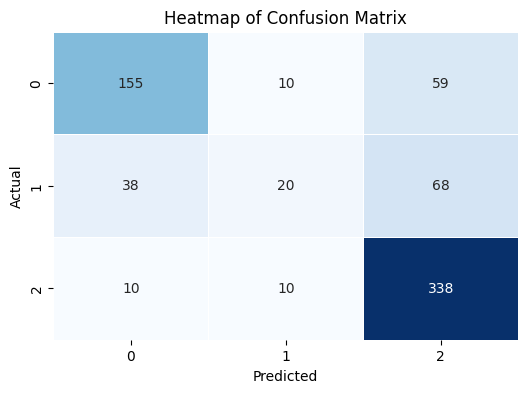

In [80]:
#evaluate the model
# Print the confusion matrix, classification report
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [81]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support



           0       0.76      0.69      0.73       224

           1       0.50      0.16      0.24       126

           2       0.73      0.94      0.82       358



    accuracy                           0.72       708

   macro avg       0.66      0.60      0.60       708

weighted avg       0.70      0.72      0.69       708




### **<font style="color:brown">K-Nearest Neighbor</font>**

In [82]:
#create KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [83]:
# Train Score
print(f"Training Score is :" ,knn.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,knn.score(X_test, y_test))



Training Score is : 0.7711864406779662

Testing Score is : 0.6680790960451978


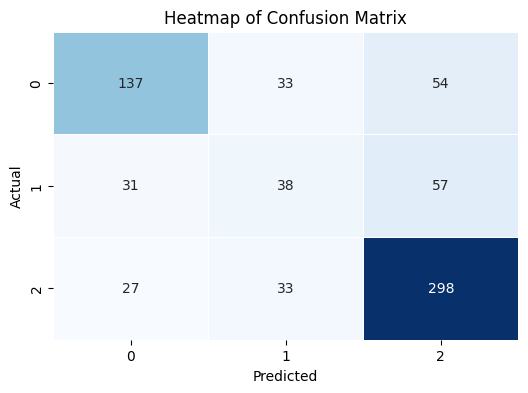

In [84]:
#make prediction on test data
y_pred = knn.predict(X_test)

#evaluate the model
# Print the confusion matrix, classification report
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [85]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support



           0       0.70      0.61      0.65       224

           1       0.37      0.30      0.33       126

           2       0.73      0.83      0.78       358



    accuracy                           0.67       708

   macro avg       0.60      0.58      0.59       708

weighted avg       0.66      0.67      0.66       708




### **<font style="color:brown">Decision Tree Classifier</font>**

In [86]:
#create Decision Tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [87]:
# Train Score
print(f"Training Score is :" ,dtree.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,dtree.score(X_test, y_test))



Training Score is : 1.0

Testing Score is : 0.692090395480226


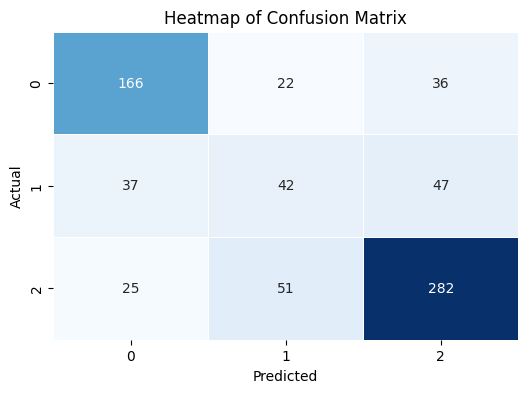

 Classification Report:

              precision    recall  f1-score   support



           0       0.73      0.74      0.73       224

           1       0.37      0.33      0.35       126

           2       0.77      0.79      0.78       358



    accuracy                           0.69       708

   macro avg       0.62      0.62      0.62       708

weighted avg       0.69      0.69      0.69       708




In [88]:
#make prediction on test data
y_pred = dtree.predict(X_test)

#evaluate the model
# Print the confusion matrix, classification report
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(" Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))



### **<font style="color:brown">Random Forest Classifier</font>**

In [111]:
#create Random Forest model > one of ensemble method
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5000, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5000, random_state=42)

In [112]:
# Train Score
print(f"Training Score is :" ,rfc.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,rfc.score(X_test, y_test))

Training Score is : 1.0

Testing Score is : 0.7754237288135594


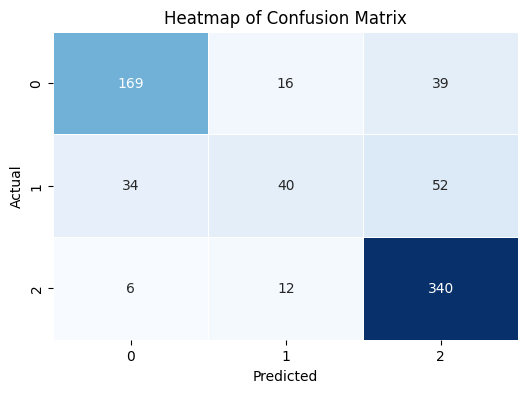

 Classification Report:

              precision    recall  f1-score   support



           0       0.81      0.75      0.78       224

           1       0.59      0.32      0.41       126

           2       0.79      0.95      0.86       358



    accuracy                           0.78       708

   macro avg       0.73      0.67      0.68       708

weighted avg       0.76      0.78      0.76       708




In [113]:
#make prediction on test data
y_pred = rfc.predict(X_test)

#evaluate the model
# Print the confusion matrix, classification report
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(" Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


In [114]:
from joblib import dump
dump(rfc, 'random_forest_model.joblib')

['random_forest_model.joblib']

### **<font style="color:brown">XGBoost Classifier</font>**

In [92]:
#apply XGBoost model
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=5000, learning_rate=0.001, max_depth=7, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [93]:
# Train Score
print(f"Training Score is :" ,xgb.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,xgb.score(X_test, y_test))

Training Score is : 0.9530367231638418

Testing Score is : 0.7584745762711864


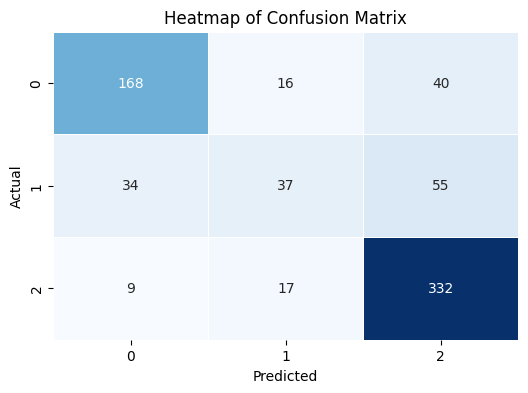

 Classification Report:

              precision    recall  f1-score   support



           0       0.80      0.75      0.77       224

           1       0.53      0.29      0.38       126

           2       0.78      0.93      0.85       358



    accuracy                           0.76       708

   macro avg       0.70      0.66      0.67       708

weighted avg       0.74      0.76      0.74       708




In [94]:
#make prediction on test data
y_pred = xgb.predict(X_test)

#evaluate the model
# Print the confusion matrix, classification report
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(" Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


### **<font style="color:brown">Gradient Boosting</font>**

In [95]:
#create Gradient Boosting model > one of ensemble method
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.001, max_depth=7, random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, max_depth=7, n_estimators=5000,
                           random_state=42)

In [96]:
# Train Score
print(f"Training Score is :" ,gbc.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,gbc.score(X_test, y_test))



Training Score is : 0.9872881355932204

Testing Score is : 0.7598870056497176


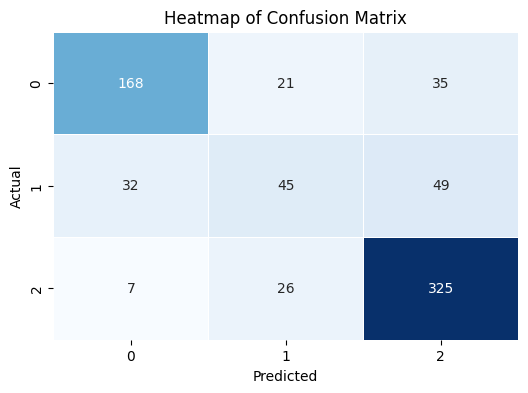

 Classification Report:

              precision    recall  f1-score   support



           0       0.81      0.75      0.78       224

           1       0.49      0.36      0.41       126

           2       0.79      0.91      0.85       358



    accuracy                           0.76       708

   macro avg       0.70      0.67      0.68       708

weighted avg       0.75      0.76      0.75       708




In [97]:
#make prediction on test data
y_pred = gbc.predict(X_test)

#evaluate the model
# Print the confusion matrix, classification report
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(" Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


### **<font style="color:brown">AdaBoosting model</font>**

In [98]:
#create AdaBoost model > one of ensemble method
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5000, learning_rate=0.001, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=5000, random_state=42)

In [99]:
# Train Score
print(f"Training Score is :" ,ada.score(X_train, y_train))

# Test Score
print(f"Testing Score is :" ,ada.score(X_test, y_test))



Training Score is : 0.736228813559322

Testing Score is : 0.7415254237288136


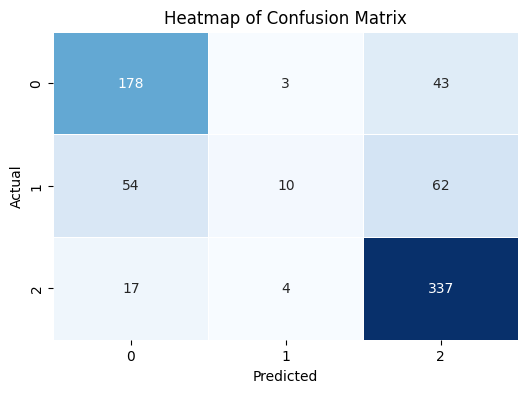

 Classification Report:

              precision    recall  f1-score   support



           0       0.71      0.79      0.75       224

           1       0.59      0.08      0.14       126

           2       0.76      0.94      0.84       358



    accuracy                           0.74       708

   macro avg       0.69      0.61      0.58       708

weighted avg       0.72      0.74      0.69       708




In [100]:
#make prediction on test data
y_pred = ada.predict(X_test)

#evaluate the model
# Print the confusion matrix, classification report
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(" Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

## **Make Predictive system**

In [144]:
import pandas as pd
from joblib import load

#Read sumbission file
samples = pd.read_csv(r'F:\Trainings\IEEE Competition\New folder\submission.csv')

#apply one hot encoding to 'Target' column in samples datafarme with sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
onehot_target = le.fit_transform(samples['Target'])

#edit df_train dataframe after one hot encoding
samples['Target']=onehot_target

# Get the current name of the first column
first_column = samples.columns[0]

# Rename the first column to 'ID'
samples = samples.rename(columns={first_column: 'ID'})


In [145]:
# Load the trained model
model = load('random_forest_model.joblib')

# Make predictions
y_sub_pred = model.predict(df_test)


In [146]:
# Write the predictions to a submission file
samples["Target"] = y_sub_pred
#decode
samples = samples.replace({'Target': {0: 'Dropout', 1: 'Enrolled' ,2: 'Graduate'}})  
samples.to_csv(r"F:\Trainings\IEEE Competition\Notebook for comp\submission.csv", index=None)

In [147]:
#print the submission file
print(samples)

       ID    Target

0    3540   Dropout

1    3541   Dropout

2    3542  Graduate

3    3543   Dropout

4    3544   Dropout

..    ...       ...

879  4419  Graduate

880  4420   Dropout

881  4421   Dropout

882  4422  Graduate

883  4423  Graduate



[884 rows x 2 columns]
